In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('flipkart.csv')
data

,Unnamed: 0,Product_name,Review,Rating
0,0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5
...,...,...,...,...
2299,2299,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,"Great display, accurate colours at this price ...",5
2300,2300,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Superb monitor first brought 1 used for 2 mont...,5
2301,2301,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Awesome,5
2302,2302,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Only one issue with adapter,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2304 non-null   int64 
 1   Product_name  2304 non-null   object
 2   Review        2304 non-null   object
 3   Rating        2304 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 72.1+ KB


In [4]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2299    False
2300    False
2301    False
2302    False
2303    False
Length: 2304, dtype: bool

In [5]:
data.duplicated().sum()

0

In [6]:
data['Product_name'].nunique()


231

In [7]:
data.Rating.nunique()

5

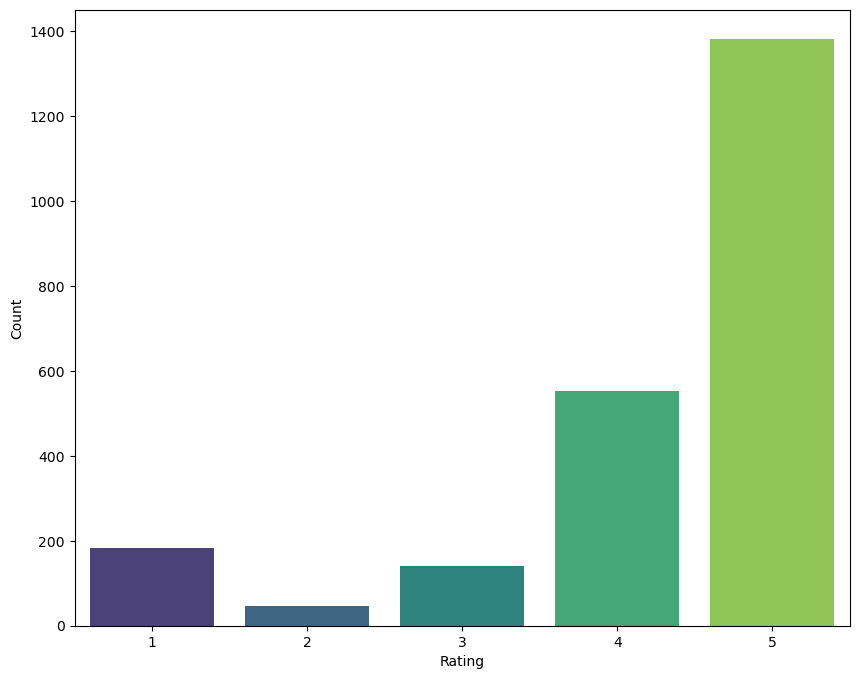

In [8]:
rate = data['Rating'].value_counts().reset_index()
rate.columns = ['Rating', 'Count']
plt.figure(figsize=(10, 8))
sns.barplot(x='Rating', y='Count', data=rate, palette='viridis')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [9]:
import re
def cleaning(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) 
    text = re.sub('#','',text) 
    text = re.sub('https?:\/\/\S+', '', text)  
    text = re.sub('\n',' ',text) 
    text = re.sub(r'www\S+', " ", text)
    text = re.sub(r'\.|/|:|-', " ", text)
    text = re.sub(r'[^\w\s]','',text)
    return text
data['Review'] = data['Review'].apply(cleaning)
data

,Unnamed: 0,Product_name,Review,Rating
0,0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence,5
2,2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product,5
4,4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,Light weight laptop with new amazing features ...,5
...,...,...,...,...
2299,2299,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Great display accurate colours at this price r...,5
2300,2300,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Superb monitor first brought 1 used for 2 mont...,5
2301,2301,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Awesome,5
2302,2302,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Only one issue with adapter,5


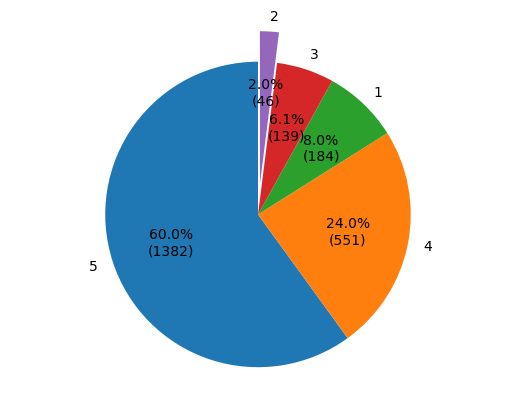

In [10]:
rate = data['Rating'].value_counts()

num = rate.index
qty = rate.values
explode = (0,0,0,0.0,0.2)  

plt.pie(qty, labels=num, explode=explode, autopct=lambda pct: f"{pct:.1f}%\n({int(pct / 100 * sum(qty))})",startangle=90)
plt.axis('equal')  
plt.show()


In [11]:
def analyse(val):
    if val>3:
        return 'Positive'
    elif val<3:
        return 'Negative'
    else :
        return 'Neutral'
 
data['analyse']= data.Rating.apply(analyse)

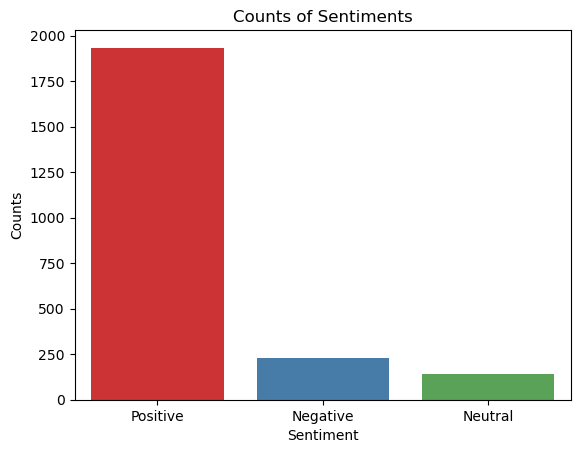

In [12]:
analyse1 =  data['analyse'].value_counts()
sns.barplot(x=analyse1.index, y=analyse1.values, palette='Set1')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.title('Counts of Sentiments')
plt.show()

In [13]:
data.columns


Index(['Unnamed: 0', 'Product_name', 'Review', 'Rating', 'analyse'], dtype='object')

In [14]:
data.drop(columns=['Unnamed: 0'],inplace=True)
data

,Product_name,Review,Rating,analyse
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5,Positive
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence,5,Positive
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5,Positive
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product,5,Positive
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,Light weight laptop with new amazing features ...,5,Positive
...,...,...,...,...
2299,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Great display accurate colours at this price r...,5,Positive
2300,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Superb monitor first brought 1 used for 2 mont...,5,Positive
2301,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Awesome,5,Positive
2302,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Only one issue with adapter,5,Positive


[nltk_data] Downloading package stopwords to C:\Users\Priyanshu
[nltk_data]     Upadhyay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


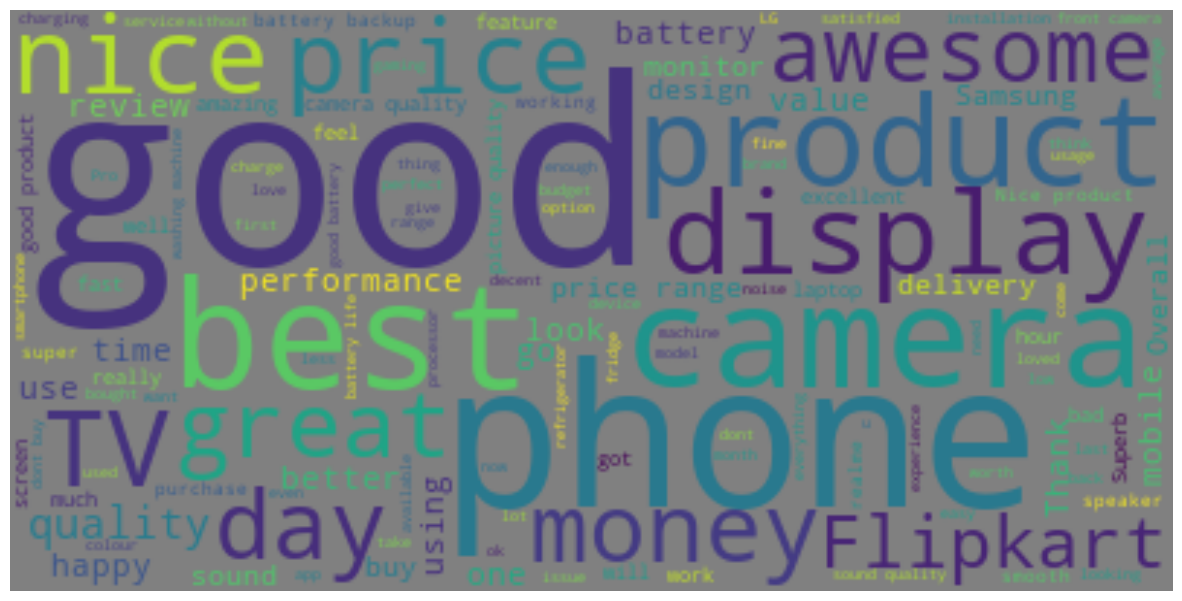

In [15]:
import nltk
from wordcloud import WordCloud, STOPWORDS
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

text = " ".join(i for i in data.Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="GRAY").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
x = data['Review']
y = data['analyse']

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

token = Tokenizer()
token.fit_on_texts(x)
x1 = token.texts_to_sequences(x)

In [19]:
len1 = 20 
X_pad = pad_sequences(x1, maxlen=len1, padding='post')

label= {'Positive': 2, 'Negative': 0, 'Neutral':1} 
y = data['analyse'].map(label)

num_class= len(label)
y_enc = tf.keras.utils.to_categorical(y, num_classes=num_class)





In [20]:
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pad, y_enc, test_size=0.2, random_state=42)


model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(token.word_index)+1, output_dim=100, ),
    tf.keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(num_class, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
model.summary()


Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8048 - loss: 0.7910 - val_accuracy: 0.8547 - val_loss: 0.4730
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8382 - loss: 0.4902 - val_accuracy: 0.8850 - val_loss: 0.3419
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9002 - loss: 0.2958 - val_accuracy: 0.9197 - val_loss: 0.3039
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9389 - loss: 0.2012 - val_accuracy: 0.9154 - val_loss: 0.2872
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9487 - loss: 0.1626 - val_accuracy: 0.9262 - val_loss: 0.2757
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9668 - loss: 0.1375 - val_accuracy: 0.9284 - val_loss: 0.3105
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9735 - loss: 0.0972 - val_accuracy: 0.9349 - val_loss: 0.2744
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9673 - loss: 0.1367 - val_accuracy: 0.9176 - val_l

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ embedding (Embedding)         │ (None, 20, 100)       │      467,300 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ lstm (LSTM)                   │ (None, 64)            │       42,240 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense (Dense)                 │ (None, 3)             │          195 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 1,529,207 (5.83 MB)

 Trainable params: 509,735 (1.94 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,019,472 (3.89 MB)

In [21]:
from sklearn.metrics import accuracy_score, classification_report
#Evaluation
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy Score: {accuracy:.4f}\n")

target = list(label.keys())
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=target))



15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Accuracy Score: 0.9414

Classification Report:
              precision    recall  f1-score   support

    Positive       0.81      0.91      0.86        43
    Negative       0.79      0.46      0.58        24
     Neutral       0.96      0.97      0.97       394

    accuracy                           0.94       461
   macro avg       0.85      0.78      0.80       461
weighted avg       0.94      0.94      0.94       461



In [22]:
predictions = model.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
